macOS에서 AppleGothic 폰트를 설정했습니다.


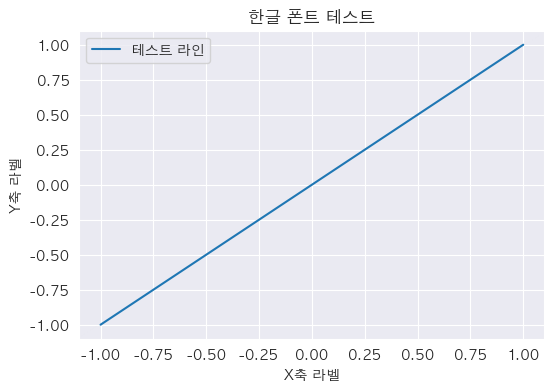

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform
import os

# 1. 운영체제에 맞는 폰트 경로 설정
system_name = platform.system()

if system_name == 'Darwin': # macOS
    # macOS의 경우, 시스템에 있는 'AppleGothic' 폰트를 사용합니다.
    # 별도의 폰트 파일 설치가 필요 없을 수 있습니다.
    font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
    plt.rc('font', family='AppleGothic')
    print("macOS에서 AppleGothic 폰트를 설정했습니다.")

elif system_name == 'Windows': # Windows
    # Windows의 경우, 'Malgun Gothic'이 일반적으로 설치되어 있습니다.
    font_path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = fm.FontProperties(fname=font_path).get_name()
    plt.rc('font', family=font_name)
    print("Windows에서 Malgun Gothic 폰트를 설정했습니다.")

else: # Linux (Google Colab 등)
    # 나눔고딕 폰트를 다운로드하여 설치합니다.
    # 터미널 명령어를 사용하지 않고, 파이썬 코드로 처리합니다.
    print("Linux 환경으로 감지되어 나눔고딕 폰트를 설치합니다.")

    # 폰트 다운로드
    font_url = 'https://github.com/google/fonts/raw/main/ofl/nanumgothic/NanumGothic-Regular.ttf'
    font_path = 'NanumGothic-Regular.ttf'

    if not os.path.exists(font_path):
        import urllib.request
        urllib.request.urlretrieve(font_url, font_path)
        print(f"'{font_path}' 폰트를 다운로드했습니다.")

    # Matplotlib의 폰트 매니저에 폰트 추가
    fm.fontManager.addfont(font_path)

    # Matplotlib의 rcParams를 직접 수정하여 폰트 설정
    font_name = fm.FontProperties(fname=font_path).get_name()
    plt.rc('font', family=font_name)
    print(f"나눔고딕 폰트('{font_name}')를 설정했습니다.")
    print("❗️ 중요: 이 셀 실행 후, 상단 메뉴에서 [Kernel] -> [Restart Kernel]을 선택하여 커널을 재시작해야 폰트가 적용됩니다.")

# 2. 마이너스 부호 깨짐 방지 설정
# 위에서 폰트 설정이 완료된 후, 마이너스(-) 부호가 깨지는 것을 방지합니다.
plt.rcParams['axes.unicode_minus'] = False

# 3. 테스트 그래프 그리기
plt.figure(figsize=(6, 4))
plt.plot([-1, 0, 1], [-1, 0, 1], label='테스트 라인')
plt.title('한글 폰트 테스트')
plt.xlabel('X축 라벨')
plt.ylabel('Y축 라벨')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import os
import datetime
import calendar
import warnings
import platform

# Warnings 제거(데이터 EDA 시 불필요한 경고 메시지 제거)
warnings.filterwarnings('ignore')

In [2]:
# ▶ pd.set option 설정 (출력 시 컬럼, 행 제한 없음)
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

# 데이터 명세서

---

## 1. 지하철 월별 승하차 인원 데이터 (CARD_SUBWAY_MONTH_YYYYMM.csv)

2019년 1월부터 6월까지의 지하철 역별 일일 승하차 인원 정보를 담고 있습니다.

| 컬럼명 | 데이터 타입 | 설명 | 예시 |
|---|---|---|---|
| `사용일자` | 정수 (Integer) | 승하차 기록이 발생한 날짜 (YYYYMMDD) | 20190101 |
| `노선명` | 문자열 (String) | 지하철 호선 이름 | 2호선 |
| `역명` | 문자열 (String) | 지하철 역 이름 | 을지로4가 |
| `승차총승객수` | 실수 (Float) | 해당 역에서 승차한 총 승객 수 | 3862.0 |
| `하차총승객수` | 실수 (Float) | 해당 역에서 하차한 총 승객 수 | 3728.0 |
| `등록일자` | 정수 (Integer) | 데이터가 시스템에 등록된 날짜 (YYYYMMDD) | 20190104 |


In [10]:
# 폴더/파일을 관리하는 os 라이브러리를 불러옵니다.(just 상대경로 text 변수에 담기)
dirpath_2 = './../rawfiles/CARD_SUBWAY_MONTH_201902.csv'
dirpath_3 = './../rawfiles/CARD_SUBWAY_MONTH_201903.csv'
dirpath_1 = './../rawfiles/CARD_SUBWAY_MONTH_201901.csv'
dirpath_4 = './../rawfiles/CARD_SUBWAY_MONTH_201904.csv'
dirpath_5 = './../rawfiles/CARD_SUBWAY_MONTH_201905.csv'
dirpath_6 = './../rawfiles/CARD_SUBWAY_MONTH_201906.csv'

## EDA 실습을 통해 해결해야 할 질문들

- 2019.01~06 중에 언제 지하철을 가장 많이 이용했을까? (기준: 승하자총승객수)
- 1월~6월중에 5월에 지하철 승객수가 많다? (기준 :승하자총승객수)
- 요일중에서 목요일에 지하철 승객수가 많다? (기준 :승하자총승객수)
- 일자별(월일별) 승하차승객수 그래프 그려 볼까요? (기준 :승하자총승객수)
- 가장 승객이 많이 타는 승차역은?
- 노선별로 역별/요일별 승차승객수를 비교해 볼수 있을까? (1~9호선, 역별/요일별 heatmap)
- 1호선에서 가장 하자를 많이 하는 역은? (groupby)
- 2호선중에서 어느 역에서 승차가 가장 많이 발생할까? (Folium 역 표시)

수집된 데이터의 기본 정보들을 확인

(1) Data shape(형태) 확인

(2) Data type 확인

(3) Null값 확인 (※ 빈 값의 Data)

(4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)

In [11]:
# 이번에 여러 파일을 불러오겠습니다. (걍 예제코드에 있어서 비슷하게 작성해본 코드 입니다. GLOBE 사용시 불필요한 반복 코드를 줄일 수 있습니다.)
# 6개 파일 불러와서 합치기

raw = pd.DataFrame()
raw.head()

temp1 = pd.read_csv(dirpath_1)
temp2 = pd.read_csv(dirpath_2)
temp3 = pd.read_csv(dirpath_3)
temp4 = pd.read_csv(dirpath_4)
temp5 = pd.read_csv(dirpath_5)
temp6 = pd.read_csv(dirpath_6)


# pandas concat 합치때, 인덱스 번호 그래로 간다. 옵션 ignore_index=True 사용하면 인덱스 새로 생성
raw = pd.concat([temp1, temp2, temp3, temp4, temp5, temp6], axis=0)

--- Total Passengers by Month ---
month
01    442746389.0
02    379836010.0
03    466692826.0
04    470934348.0
05    485718557.0
06    442210635.0
Name: total_passengers, dtype: float64

The busiest month in the first half of 2019 was month '05',
   with a total of 485,718,557 passengers.


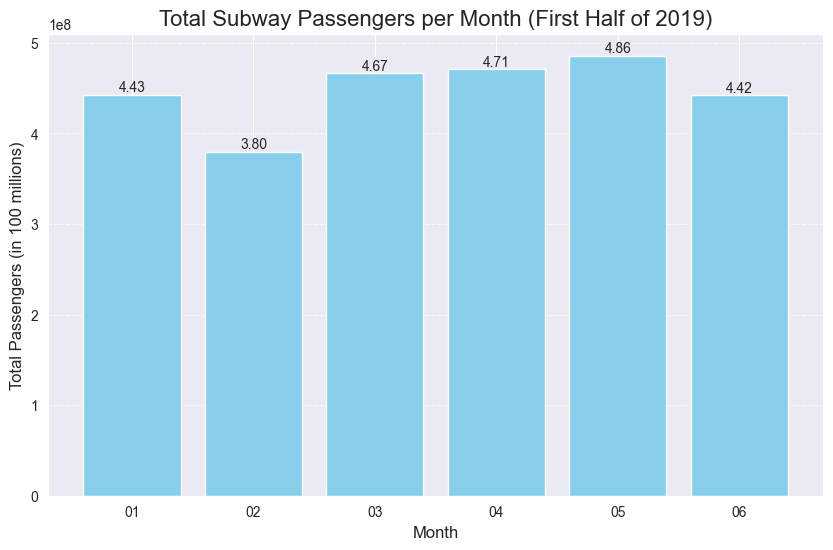

In [12]:
#문제 1: 2019.01~06 중에 언제 지하철을 가장 많이 이용했을까? (기준: 승하자총승객수)

# 1. 승차와 하차 승객을 합쳐 총 승객수 컬럼을 생성합니다.
raw['total_passengers'] = raw['승차총승객수'] + raw['하차총승객수']

# 2. '사용일자' 컬럼에서 '월' 정보를 추출합니다.
# 먼저 '사용일자' 컬럼을 문자열로 변환한 다음, 월 부분을 잘라냅니다. (20190401, 4, 5번째 자리 추출)
raw['month'] = raw['사용일자'].astype(str).str[4:6]

# 3. 월별로 총 승객수를 집계합니다.
monthly_usage = raw.groupby('month')['total_passengers'].sum()

# 4. 결과를 출력합니다.
# 이용객이 가장 많은 달을 찾습니다.
max_month = monthly_usage.idxmax()
max_usage = monthly_usage.max()

print("--- Total Passengers by Month ---")
print(monthly_usage)
print("\n" + "="*50)
print(f"The busiest month in the first half of 2019 was month '{max_month}',")
print(f"   with a total of {max_usage:,.0f} passengers.")
print("="*50)

# 5. 월별 승객 데이터를 막대 차트로 시각화합니다.
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_usage.index, monthly_usage.values, color='skyblue')

plt.title('Total Subway Passengers per Month (First Half of 2019)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Passengers (in 100 millions)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 각 막대 위에 텍스트 레이블을 추가합니다.
for bar in bars:
    yval = bar.get_height()
    # 값을 억(1e8) 단위로 표시합니다.
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval/1e8:.2f}', va='bottom', ha='center')

plt.show()

--- Analysis for Question 2: Is May the busiest month? ---
📄 Yes, May ('05') has the highest number of passengers compared to other months in the first half of 2019.


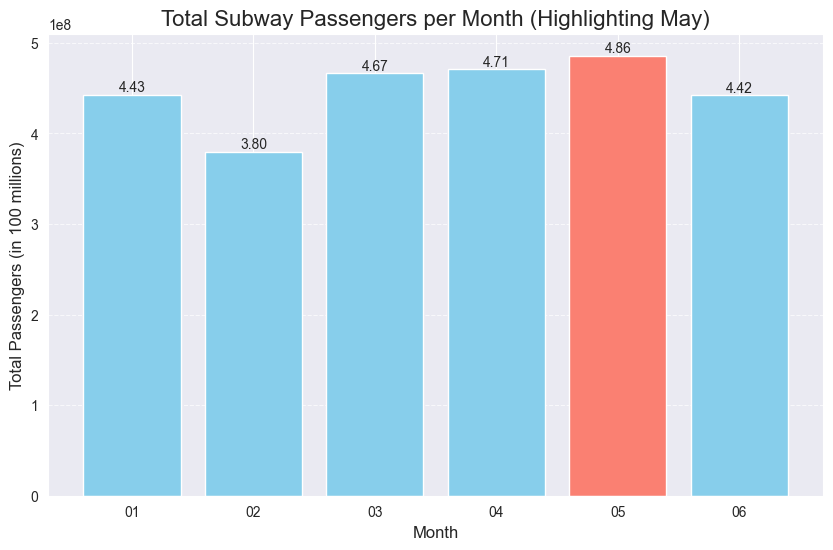

In [13]:
 #문제 2: 1월~6월 중 5월에 지하철 승객수가 가장 많을까?

# 1. 문제 해결에 필요한 컬럼을 생성합니다.
# 승차와 하차 승객을 합쳐 총 승객수 컬럼을 생성합니다.
raw['total_passengers'] = raw['승차총승객수'] + raw['하차총승객수']

# '사용일자' 컬럼에서 '월' 정보를 추출합니다.
raw['month'] = raw['사용일자'].astype(str).str[4:6]

# 2. 월별로 총 승객수를 집계합니다.
monthly_usage = raw.groupby('month')['total_passengers'].sum()

# 3. 5월의 승객수와 다른 달의 최대 승객수를 비교합니다.
# 5월의 승객수를 가져옵니다.
may_usage = monthly_usage.loc['05']
# 5월을 제외한 다른 달들의 최대 승객수를 찾습니다.
other_months_max = monthly_usage.drop('05').max()

# 4. 최종 결과를 비교하고 출력합니다.
print("="*50)
print("--- Analysis for Question 2: Is May the busiest month? ---")
if may_usage > other_months_max:
    print("📄 Yes, May ('05') has the highest number of passengers compared to other months in the first half of 2019.")
else:
    # 만약 5월이 최다 이용객 달이 아니라면, 실제 최다 이용객 달을 찾아 알려줍니다.
    busiest_month_name = monthly_usage.idxmax()
    print(f"📄 No, May is not the busiest month. The busiest month is '{busiest_month_name}'.")
print("="*50)

# 5. 결과를 시각화합니다.
plt.figure(figsize=(10, 6))
# 5월 막대만 다른 색으로 표시하기 위한 색상 리스트를 생성합니다.
colors = ['skyblue' if month != '05' else 'salmon' for month in monthly_usage.index]
bars = plt.bar(monthly_usage.index, monthly_usage.values, color=colors)

plt.title('Total Subway Passengers per Month (Highlighting May)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Passengers (in 100 millions)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 각 막대 위에 텍스트 레이블을 추가합니다.
for bar in bars:
    yval = bar.get_height()
    # 값을 억(1e8) 단위로 표시합니다.
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval/1e8:.2f}', va='bottom', ha='center')

plt.show()

--- Analysis for Question 3: Is Thursday the busiest day? ---
📄 No, Thursday is not the busiest day. The busiest day is 'Friday'.


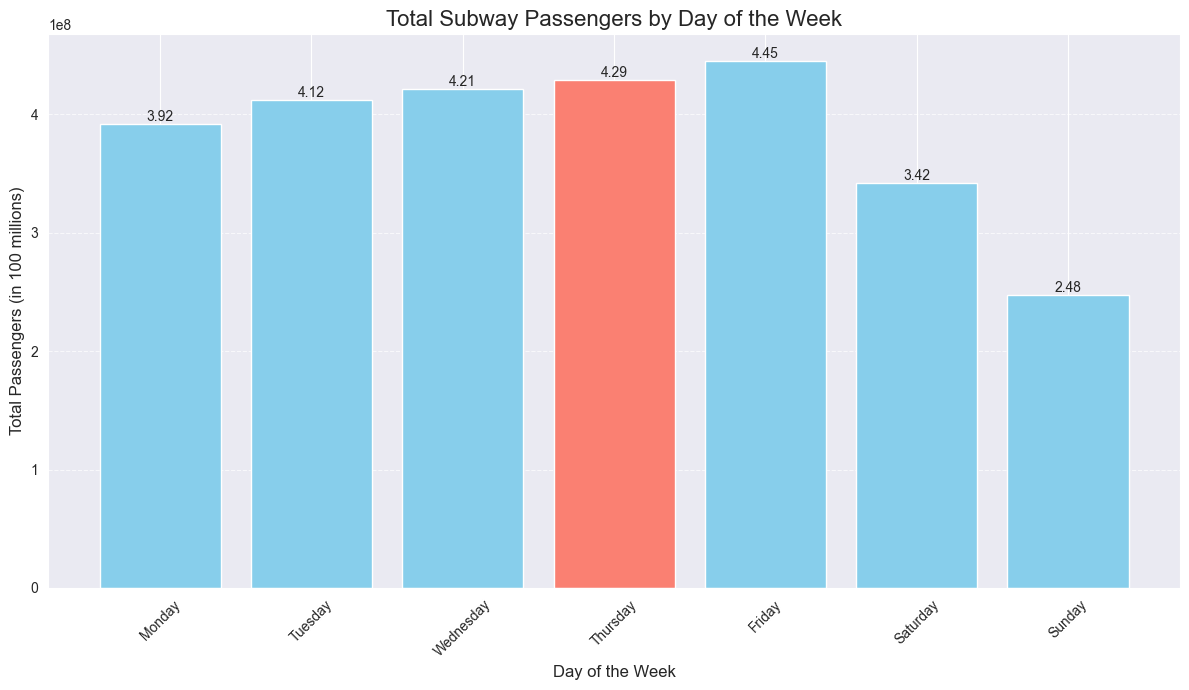

In [14]:
#문제 3: 요일중에서 목요일에 지하철 승객수가 많다?

# 1. 문제 해결에 필요한 컬럼을 생성합니다.
# 승차와 하차 승객을 합쳐 총 승객수 컬럼을 생성합니다. 만약에 위에서 total_passengers 컬럼이 이미 있다면 다시 만들지 않습니다.
if 'total_passengers' not in raw.columns:
    raw['total_passengers'] = raw['승차총승객수'] + raw['하차총승객수']
# '사용일자' 컬럼을 날짜 형식으로 변환합니다. (20190201)
raw['date'] = pd.to_datetime(raw['사용일자'], format='%Y%m%d')
# 날짜에서 요일 이름을 추출합니다.
raw['day_of_week'] = raw['date'].dt.day_name()

# 2. 요일별로 총 승객수를 집계합니다.
daily_usage = raw.groupby('day_of_week')['total_passengers'].sum()
# 요일 순서를 월요일부터 일요일까지 맞추기 위해 재정렬합니다.
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_usage = daily_usage.reindex(days_order)

# 3. 목요일의 승객수와 다른 요일의 최대 승객수를 비교합니다.
# 목요일의 승객수를 가져옵니다.
thursday_usage = daily_usage.loc['Thursday']
# 목요일을 제외한 다른 요일들의 최대 승객수를 찾습니다.
other_days_max = daily_usage.drop('Thursday').max()

# 4. 최종 결과를 비교하고 출력합니다.
print("="*50)
print("--- Analysis for Question 3: Is Thursday the busiest day? ---")
if thursday_usage > other_days_max:
    print("📄 Yes, Thursday has the highest number of passengers compared to other days of the week.")
else:
    # 만약 목요일이 최다 이용객 요일이 아니라면, 실제 최다 이용객 요일을 찾아 알려줍니다.
    busiest_day_name = daily_usage.idxmax()
    print(f"📄 No, Thursday is not the busiest day. The busiest day is '{busiest_day_name}'.")
print("="*50)


# 5. 결과를 시각화합니다.
plt.figure(figsize=(12, 7))
# 목요일 막대만 다른 색으로 표시하기 위한 색상 리스트를 생성합니다.
colors = ['skyblue' if day != 'Thursday' else 'salmon' for day in daily_usage.index]
bars = plt.bar(daily_usage.index, daily_usage.values, color=colors)

plt.title('Total Subway Passengers by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Passengers (in 100 millions)', fontsize=12)
plt.xticks(rotation=45) # 요일 이름이 겹치지 않게 살짝 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 각 막대 위에 텍스트 레이블을 추가합니다.
for bar in bars:
    yval = bar.get_height()
    # 값을 억(1e8) 단위로 표시합니다.
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval/1e8:.2f}', va='bottom', ha='center')

plt.tight_layout() # 레이블이 잘리지 않도록 레이아웃 조정
plt.show()

--- Analysis for Question 5: Which station has the most boardings? ---
📄 The busiest station for boarding is '강남',
   with a total of 59,000,000 passengers.

--- Top 10 Busiest Stations for Boarding ---
역명
강남      59000000
신림      56500000
잠실      55300000
홍대입구    52200000
구로      22000000
사당      21000000
Name: 승차총승객수, dtype: int64


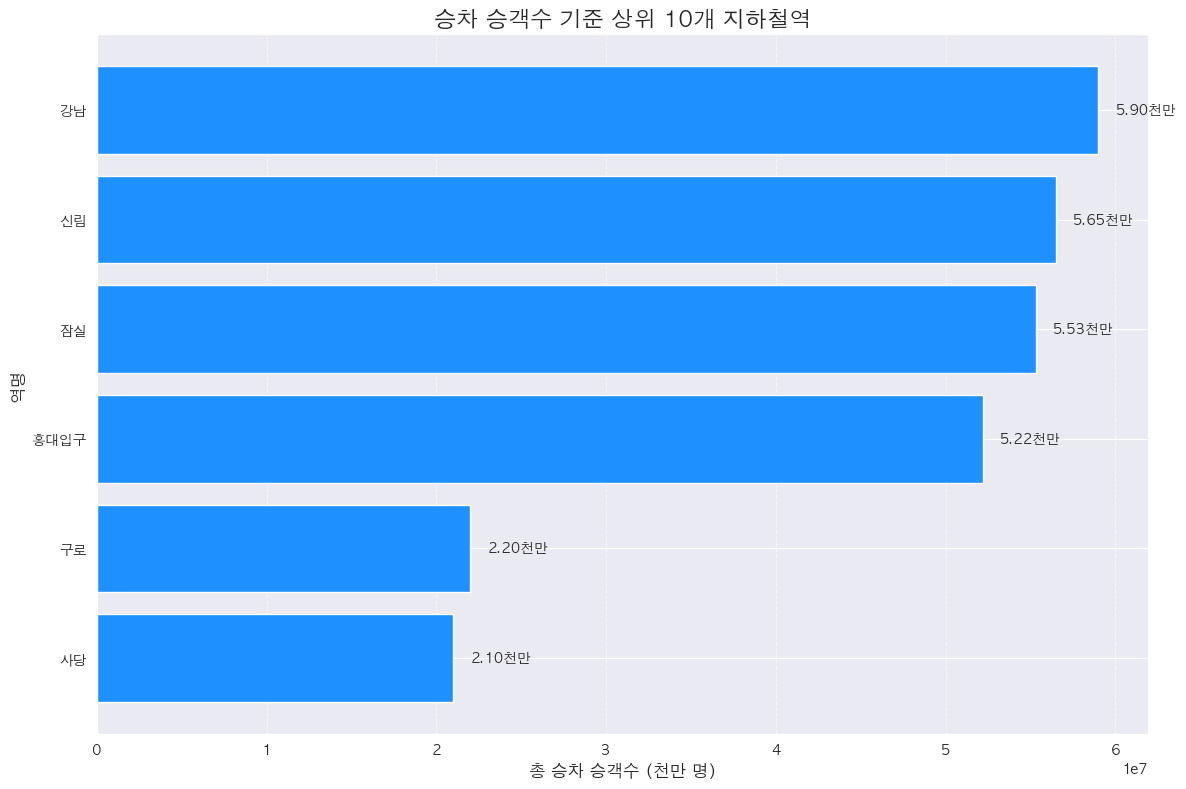

--- Analysis for Question 5: Which station has the most boardings? ---
📄 The busiest station for boarding is '강남',
   with a total of 59,000,000 passengers.

--- Top 10 Busiest Stations for Boarding ---
역명
강남      59000000
신림      56500000
잠실      55300000
홍대입구    52200000
구로      22000000
사당      21000000
Name: 승차총승객수, dtype: int64


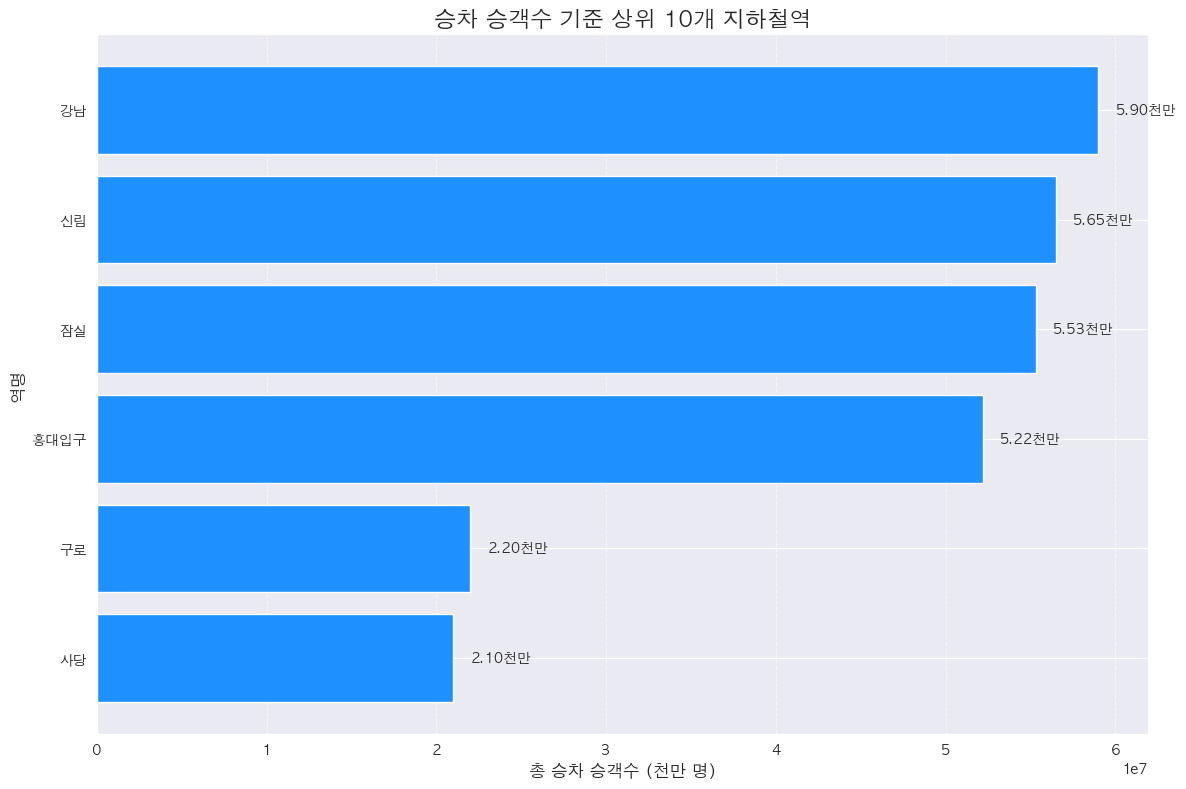

In [8]:
# 문제 5: 가장 승객이 많이 타는 승차역은?
system_name = platform.system()
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'

# 마이너스 부호 깨짐 방지 설정
plt.rcParams['axes.unicode_minus'] = False

raw = pd.DataFrame(raw)

# 1. 역명을 기준으로 그룹화하여 승차 총 승객수의 합계를 구합니다.
station_boarding_totals = raw.groupby('역명')['승차총승객수'].sum()

# 2. 승차 총 승객수를 기준으로 내림차순 정렬합니다.
sorted_stations = station_boarding_totals.sort_values(ascending=False)

# 3. 승객이 가장 많은 역(1위)을 찾습니다.
top_station_name = sorted_stations.index[0]
top_station_passengers = sorted_stations.iloc[0]

# 4. 최종 결과를 출력합니다.
print("="*60)
print("--- Analysis for Question 5: Which station has the most boardings? ---")
print(f"📄 The busiest station for boarding is '{top_station_name}',")
print(f"   with a total of {top_station_passengers:,.0f} passengers.")
print("="*60)
print("\n--- Top 10 Busiest Stations for Boarding ---")
print(sorted_stations.head(10))
print("="*60)


# 5. 상위 10개 역을 시각화합니다. (수평 막대그래프)
top_10_stations = sorted_stations.head(10)

plt.figure(figsize=(12, 8))
# 순서를 뒤집어서( [::-1] ) 가장 많은 역이 맨 위에 오도록 합니다.
bars = plt.barh(top_10_stations.index[::-1], top_10_stations.values[::-1], color='dodgerblue')

# --- 그래프 제목과 라벨에 한글이 사용됩니다 ---
plt.title('승차 승객수 기준 상위 10개 지하철역', fontsize=16)
plt.xlabel('총 승차 승객수 (천만 명)', fontsize=12)
plt.ylabel('역명', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# 각 막대 끝에 승객 수를 텍스트로 표시합니다.
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1000000, # 막대 끝에서 살짝 떨어진 위치
             bar.get_y() + bar.get_height()/2,
             f'{width/1e7:.2f}천만', # 천만 단위로 표시
             va='center')

plt.tight_layout()
plt.show()

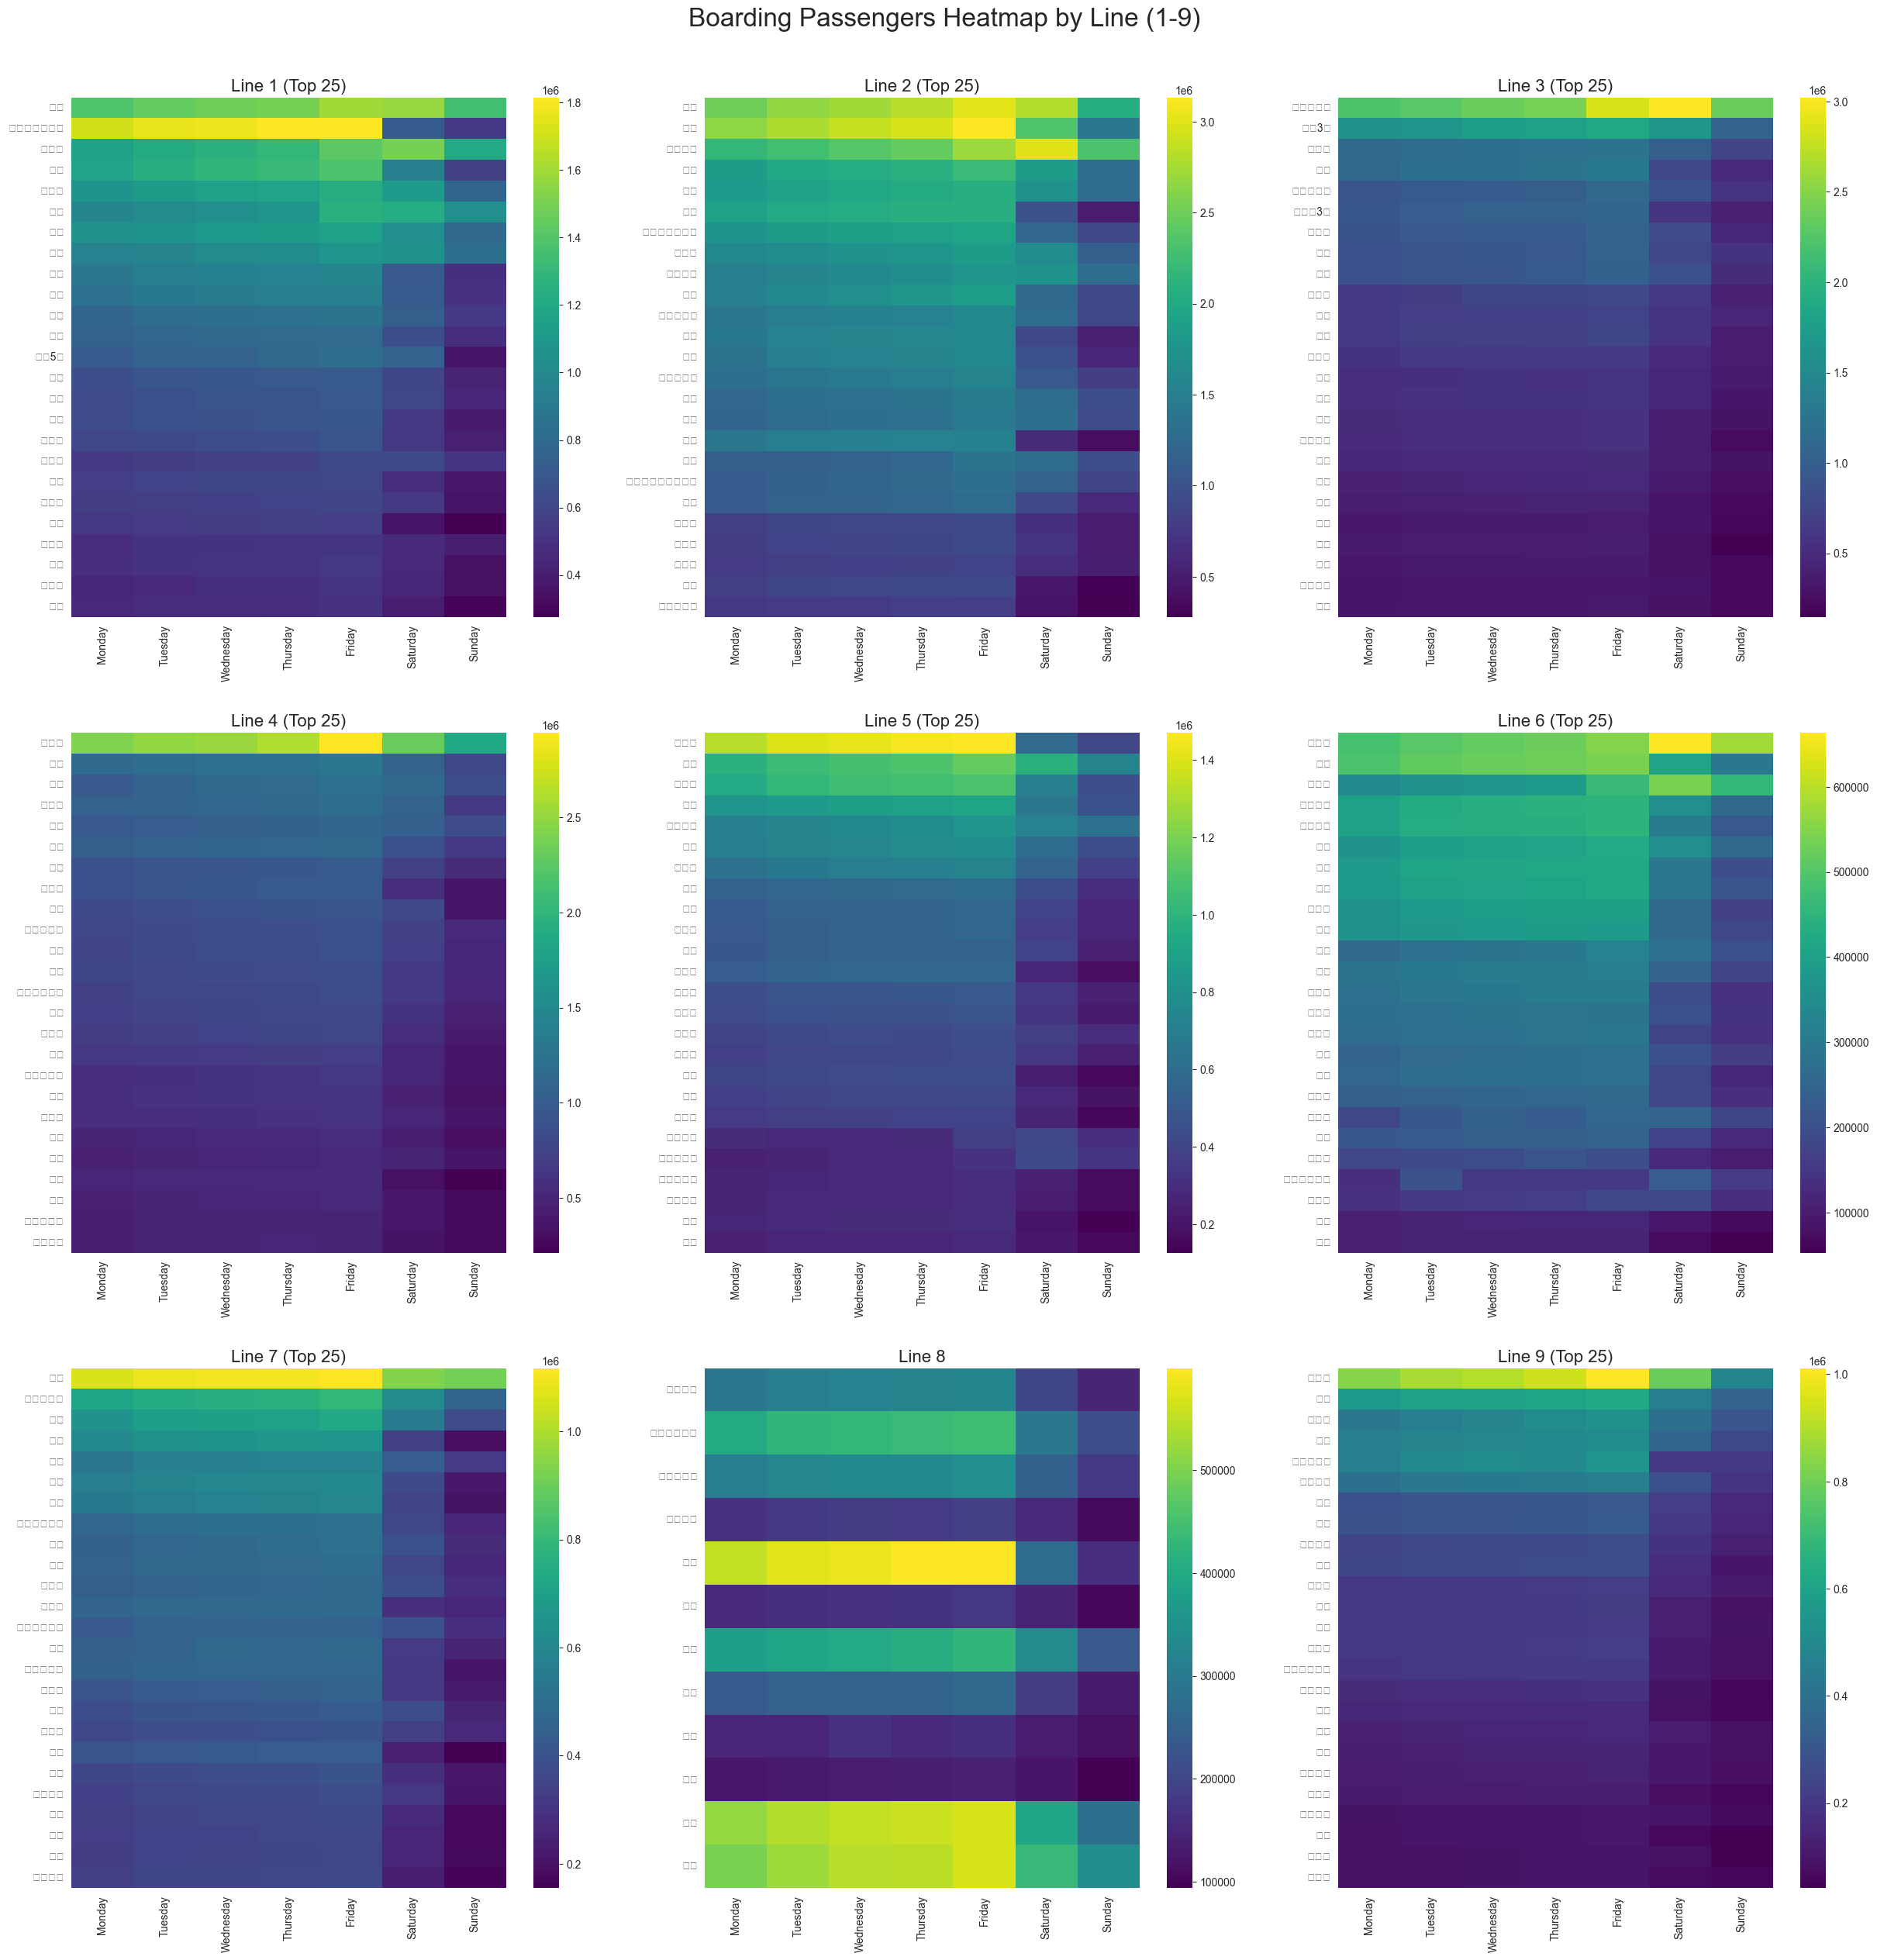

In [17]:
#문제 6: 노선별로 역별/요일별 승차승객수를 비교 (3x3 Heatmap Grid) ---

# 1. 분석에 필요한 '요일' 컬럼을 생성합니다. (이미 있다면 그대로 사용)
if 'date' not in raw.columns:
    raw['date'] = pd.to_datetime(raw['사용일자'], format='%Y%m%d')
if 'day_of_week' not in raw.columns:
    raw['day_of_week'] = raw['date'].dt.day_name()


# 2. 3x3 그리드(subplot)를 미리 생성합니다.
fig, axes = plt.subplots(3, 3, figsize=(25, 25))
# axes를 1차원 배열로 만들어 다루기 쉽게 합니다.
axes = axes.flatten()

# 3. 1호선부터 9호선까지 반복하여 각 subplot에 히트맵을 그립니다.
for i, line_num in enumerate(range(1, 10)):
    line_name = f'{line_num}호선'
    ax = axes[i] # 현재 그릴 subplot을 선택합니다.

    # 현재 노선에 해당하는 데이터만 필터링합니다.
    df_line = raw[raw['노선명'] == line_name]

    try:
        pivot_table = df_line.pivot_table(
            values='승차총승객수',
            index='역명',
            columns='day_of_week',
            aggfunc='sum',
            fill_value=0
        )

        # 역 개수가 25개를 초과하면 상위 25개만 선택합니다.
        if len(pivot_table) > 25:
            pivot_table['total'] = pivot_table.sum(axis=1)
            display_pivot = pivot_table.nlargest(25, 'total').drop('total', axis=1)
            title_suffix = ' (Top 25)'
        else:
            display_pivot = pivot_table
            title_suffix = ''

        days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        display_pivot = display_pivot.reindex(columns=days_order)

        # 4. 선택된 subplot(ax)에 히트맵을 시각화합니다.
        sns.heatmap(display_pivot, cmap='viridis', annot=False, ax=ax)

        ax.set_title(f'Line {line_num}{title_suffix}', fontsize=16)
        ax.set_xlabel('') # 개별 x축 레이블은 복잡하므로 제거
        ax.set_ylabel('') # 개별 y축 레이블은 복잡하므로 제거

    except Exception as e:
        ax.set_title(f'Error for Line {line_num}')
        print(f"Could not generate heatmap for {line_name}. Reason: {e}")

# 5. 전체 그림의 레이아웃을 조정하고 최종적으로 출력합니다.
plt.tight_layout(pad=3.0)
fig.suptitle('Boarding Passengers Heatmap by Line (1-9)', fontsize=24, y=1.02)
plt.show()

In [18]:
#문제 7: 1호선에서 가장 하차를 많이 하는 역은? (groupby) ---

print("="*60)
print("--- Analysis for Question 7: Busiest alighting station on Line 1 ---")

# 'raw' 데이터프레임이 존재하는지 먼저 확인합니다.
if 'raw' not in locals():
    print("Error: The 'raw' DataFrame is not defined.")
    print("Please load the data into a DataFrame named 'raw' before running this script.")
else:
    try:
        # 1. '노선명'이 '1호선'인 데이터만 필터링합니다.
        df_line1 = raw[raw['노선명'] == '1호선']

        # 2. '역명'을 기준으로 그룹화하고, '하차총승객수'의 합계를 계산합니다.
        line1_alighting_totals = df_line1.groupby('역명')['하차총승객수'].sum()

        # 3. 하차 승객수가 가장 많은 역의 이름과 승객 수를 찾습니다.
        # idxmax()는 가장 큰 값을 가진 인덱스(여기서는 '역명')를 반환합니다.
        top_alighting_station = line1_alighting_totals.idxmax()
        max_alighting_passengers = line1_alighting_totals.max()

        # 4. 최종 결과를 출력합니다.
        print(f"📄 The busiest station for alighting on Line 1 is '{top_alighting_station}'.")
        print(f"   A total of {max_alighting_passengers:,.0f} passengers alighted there in the first half of 2019.")

        # 추가 정보: 상위 5개 역도 함께 보여줍니다.
        print("\n--- Top 5 Alighting Stations on Line 1 ---")
        print(line1_alighting_totals.sort_values(ascending=False).head(5))

    except Exception as e:
        print(f"An error occurred during analysis: {e}")
        print("Please ensure the 'raw' DataFrame contains the necessary columns ('노선명', '역명', '하차총승객수').")

print("="*60)


--- Analysis for Question 7: Busiest alighting station on Line 1 ---
📄 The busiest station for alighting on Line 1 is '가산디지털단지'.
   A total of 10,571,381 passengers alighted there in the first half of 2019.

--- Top 5 Alighting Stations on Line 1 ---
역명
가산디지털단지    10571381.0
수원         10226609.0
영등포         9432067.0
용산          7817685.0
노량진         7603258.0
Name: 하차총승객수, dtype: float64


In [19]:
import folium

try:
    # 지하철 역 위치 정보 파일을 불러옵니다.
    df_location = pd.read_csv('/Users/hong-yuseog/PyCharmMiscProject/homework/rawfiles/지하철노선위경도정보2.csv')
except FileNotFoundError:
    print("오류: 'rawfiles/지하철노선위경도정보2.csv' 파일을 찾을 수 없습니다.")
    df_location = None


#문제 8: 2호선 최다 승차역 지도에 표시하기

print("="*60)
print("--- 8번 문제 분석: 2호선 최다 승차역 지도 표시 ---")

# 'raw'와 'df_location' 데이터가 모두 준비되었는지 확인합니다.
if 'raw' not in locals() or df_location is None:
    print("분석에 필요한 데이터가 준비되지 않았습니다. 코드를 중단합니다.")
else:
    try:
        # 1. '노선명'이 '2호선'인 데이터만 필터링합니다.
        df_line2 = raw[raw['노선명'] == '2호선']

        # 2. '역명'을 기준으로 그룹화하고, '승차총승객수'의 합계를 계산합니다.
        line2_boarding_totals = df_line2.groupby('역명')['승차총승객수'].sum()

        # 3. 승차 승객수가 가장 많은 역의 이름과 승객 수를 찾습니다.
        top_station_name = line2_boarding_totals.idxmax()
        top_station_passengers = line2_boarding_totals.max()

        print(f"📄 2호선에서 승객이 가장 많이 승차한 역은 '{top_station_name}' 입니다.")
        print(f"   총 승차 승객 수: {top_station_passengers:,.0f} 명")

        # 4. 해당 역의 위도, 경도 정보를 찾습니다.
        # 역 이름 형식을 맞추기 위해 괄호와 그 안의 내용을 제거합니다. (예: '잠실(송파구청)' -> '잠실')
        clean_station_name = top_station_name.split('(')[0]

        station_info = df_location[df_location['역이름'] == clean_station_name]

        if not station_info.empty:
            # 위도와 경도 값을 가져옵니다.
            lat = station_info.iloc[0]['위도']
            lon = station_info.iloc[0]['경도']

            # 5. Folium을 사용해 지도를 생성합니다.
            # 서울의 중심 좌표를 기준으로 지도를 엽니다.
            map_seoul = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

            # 마커에 표시할 팝업 내용을 HTML 형식으로 만듭니다.
            popup_html = f"""
            <b>📍 2호선 최다 승차역</b><br>
            <b>역 이름:</b> {top_station_name}<br>
            <b>총 승차 인원:</b> {top_station_passengers:,.0f} 명
            """

            # 지도에 마커를 추가합니다.
            folium.Marker(
                location=[lat, lon],
                popup=folium.Popup(popup_html, max_width=300),
                tooltip=f"{top_station_name} 정보 보기"
            ).add_to(map_seoul)

            # 6. 완성된 지도를 HTML 파일로 저장합니다.
            map_filename = 'line2_top_station_map.html'
            map_seoul.save(map_filename)

            print(f"\n🗺️  '{map_filename}' 이름으로 지도가 저장되었습니다.")
            print("   저장된 파일을 브라우저로 열어서 확인해보세요!")

        else:
            print(f"\n⚠️ '{clean_station_name}' 역의 위치 정보를 찾을 수 없어 지도를 생성하지 못했습니다.")

    except Exception as e:
        print(f"\n분석 중 오류가 발생했습니다: {e}")

print("="*60)


--- 8번 문제 분석: 2호선 최다 승차역 지도 표시 ---
📄 2호선에서 승객이 가장 많이 승차한 역은 '잠실' 입니다.
   총 승차 승객 수: 18,574,323 명

🗺️  'line2_top_station_map.html' 이름으로 지도가 저장되었습니다.
   저장된 파일을 브라우저로 열어서 확인해보세요!
